# ２次元 Data の整理

In [18]:
import numpy as np
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import japanize_matplotlib

%precision 3
pd.options.display.precision = 3

In [2]:
df = pd.read_csv('../data/ch2_scores_em.csv', index_col='生徒番号')

In [3]:
en_scores = np.array(df['英語'])[:10]
ma_scores = np.array(df['数学'])[:10]

scores_df = pd.DataFrame({'英語': en_scores,
                          '数学': ma_scores, },
                         index=pd.Index(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'], name='生徒'))

scores_df

,英語,数学
生徒,,
A,42,65
B,69,80
C,56,63
D,41,63
E,57,76
F,48,60
G,65,81
H,49,66
I,65,78


## ２つの Data の関係性の指標
#### 正の相関
１つの Data の値が高いほど、もう１つの Data の値も高い傾向にあること
#### 負の相関
１つの Data の値が高いほど、もう１つの Data の値が低い傾向にあること
#### 無相関
それぞれの Data が正の相関にも負の相関にも当てはまらず、それぞれの値が直接的な影響を及ばさないとき

### 共分散（covariance）
相関の関係性を数値化するための指標。
- 共分散が正であれば正の相関
- 共分散が負であれば負の相関
- 共分散が０に近ければ無相関

を表す

In [4]:
summary_df = scores_df.copy()
summary_df['英語の偏差'] = summary_df['英語'] - summary_df['英語'].mean()
summary_df['数学の偏差'] = summary_df['数学'] - summary_df['数学'].mean()
summary_df['偏差同士の積'] = summary_df['英語の偏差'] * summary_df['数学の偏差']
summary_df

,英語,数学,英語の偏差,数学の偏差,偏差同士の積
生徒,,,,,
A,42,65,-13.0,-6.4,83.2
B,69,80,14.0,8.6,120.4
C,56,63,1.0,-8.4,-8.4
D,41,63,-14.0,-8.4,117.6
E,57,76,2.0,4.6,9.2
F,48,60,-7.0,-11.4,79.8
G,65,81,10.0,9.6,96.0
H,49,66,-6.0,-5.4,32.4
I,65,78,10.0,6.6,66.0


In [5]:
summary_df['偏差同士の積'].mean()

62.800

英語の点数と数学の点数は正の相関をもっているといえそう。

NumPy で共分散を求める場合は、`cov` 関数を利用する

In [6]:
cov_mat = np.cov(en_scores, ma_scores, ddof=0)
display(cov_mat)

array([[86.  , 62.8 ],
       [62.8 , 68.44]])

- １行目１列目が第１引数の英語
- ２行目２列目が第２引数の数学

にそれぞれ対応。それらが交わる１行２列目の要素、２行目１列目の要素が英語と数学の共分散に該当。

In [7]:
cov_mat[0, 1], cov_mat[1, 0]

(62.800, 62.800)

残りの要素
- １行目の１列目は英語と英語の共分散、つまり英語の分散
- ２行目の２列目は数学と数学の共分散、つまり数学の分散

になる。

In [8]:
cov_mat[0, 0], cov_mat[1, 1]

(86.000, 68.440)

In [9]:
np.var(en_scores, ddof=0), np.var(ma_scores, ddof=0)

(86.000, 68.440)

`np.cov` 関数の同変数同士の共分散と `np.var` 関数でもとめた対象変数の分散の値が同一なことを確認。
※ DataFrame の `cov` method は、`ddof` 引数をとらず不偏分散しか計算できないため、今回割愛。

### 相関係数（correlation coefficient)

- 共分散を各 Data の標準偏差で割ることによって定義した指標
- 必ず -1 から 1 の間をとる
  - Data が正の相関をもつほど１に近づく
  - Data が負の相関をもつほど-1に近づく
  - 無相関であれば０になる。
- 共分散は単位の性質として直観的理解を困難にする。
- 共分散は各 Data の単位をかけたものになる為、各 Data の標準偏差で割ることで単位に依存しなくなる

In [12]:
# 数式とおりに相関係数を算出する
np.cov(en_scores, ma_scores, ddof=0)[0, 1] / (np.std(en_scores) * np.std(ma_scores))

0.819

相関係数が0.819という１に近い数値なった。明確な基準はないが各 Data に強い相関があるといえそうである。

In [14]:
# NumPy を利用して相関係数を求める
display(np.corrcoef(en_scores, ma_scores))

array([[1.   , 0.819],
       [0.819, 1.   ]])

相関行列の\[0, 1]の要素と\[1, 0]の要素が英語と数学の相関係数に対応。
※\[0, 0], \[1, 1]は英語と英語、数学と数学の相関係数になるので１になる

In [15]:
# DataFrame を利用して相関係数を求める
scores_df.corr()

,英語,数学
英語,1.000,0.819
数学,0.819,1.000


## ２次元 Data の視覚化
- 散布図: ２次元の Data を図示するときにとても便利
- 回帰直線: Data の関係を表現する直線
- ヒートマップ(Heatmap): Histogram の２次元版

### 散布図

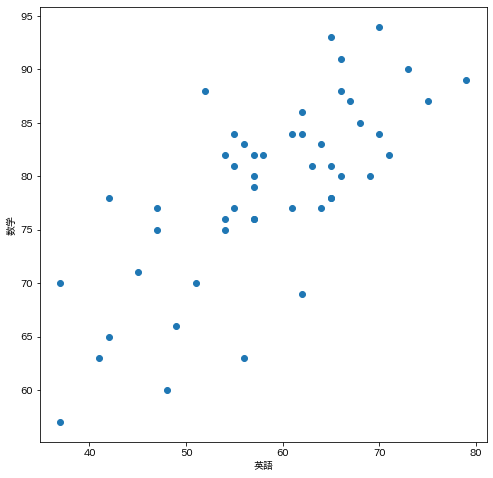

In [19]:
english_scores = np.array(df['英語'])
math_scores = np.array(df['数学'])

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
# 散布図
ax.scatter(english_scores, math_scores)
ax.set_xlabel('英語')
ax.set_ylabel('数学')

plt.show()

散布図から英語の点数が高いほど、数学の点数も高い、という傾向がありそうに見える